In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\PasupulatiVyshnavi\\Downloads\\A_B_testing_dataset.csv")

In [4]:
df.head()

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,2021-12-22,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92
3,2021-12-25,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78
4,2021-12-26,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_of_campaign          1000 non-null   object 
 1   facebook_ad_campaign      1000 non-null   object 
 2   facebook_ad_views         1000 non-null   int64  
 3   facebook_ad_clicks        1000 non-null   int64  
 4   facebook_ad_conversions   1000 non-null   int64  
 5   facebook_cost_per_ad      1000 non-null   int64  
 6   facebook_ctr              1000 non-null   float64
 7   facebook_conversion_rate  1000 non-null   float64
 8   facebook_cost_per_click   1000 non-null   float64
 9   adword_ad_campaign        1000 non-null   object 
 10  adword_ad_views           1000 non-null   int64  
 11  adword_ad_clicks          1000 non-null   int64  
 12  adword_ad_conversions     1000 non-null   int64  
 13  adword_cost_per_ad        1000 non-null   int64  
 14  adword_ct

In [6]:
df.shape

(1000, 17)

In [7]:
df.describe()

,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2152.031000,44.196000,11.975000,156.610000,2.28316,32.696080,4.310500,4771.438000,60.128000,5.933000,124.741000,1.280950,10.807510,2.265540
std,661.982166,16.833328,4.298471,54.918904,1.20670,20.570796,2.751582,598.647684,17.047822,2.011606,43.809053,0.402492,5.205133,1.101846
min,1050.000000,15.000000,5.000000,60.000000,0.49000,6.850000,0.960000,3715.000000,31.000000,3.000000,50.000000,0.540000,3.370000,0.580000
25%,1600.250000,30.000000,8.000000,110.000000,1.36750,18.052500,2.337500,4258.250000,45.000000,4.000000,86.000000,0.940000,6.970000,1.470000
50%,2123.500000,44.500000,12.000000,156.000000,2.07000,27.120000,3.600000,4808.500000,60.000000,6.000000,124.000000,1.260000,9.720000,2.030000
75%,2706.250000,58.000000,16.000000,205.000000,2.92250,41.880000,5.610000,5300.750000,75.000000,8.000000,163.000000,1.570000,13.485000,2.802500
max,3320.000000,73.000000,19.000000,250.000000,6.86000,118.750000,16.530000,5754.000000,89.000000,9.000000,200.000000,2.370000,29.030000,6.190000


## Comparing Campaign Performance

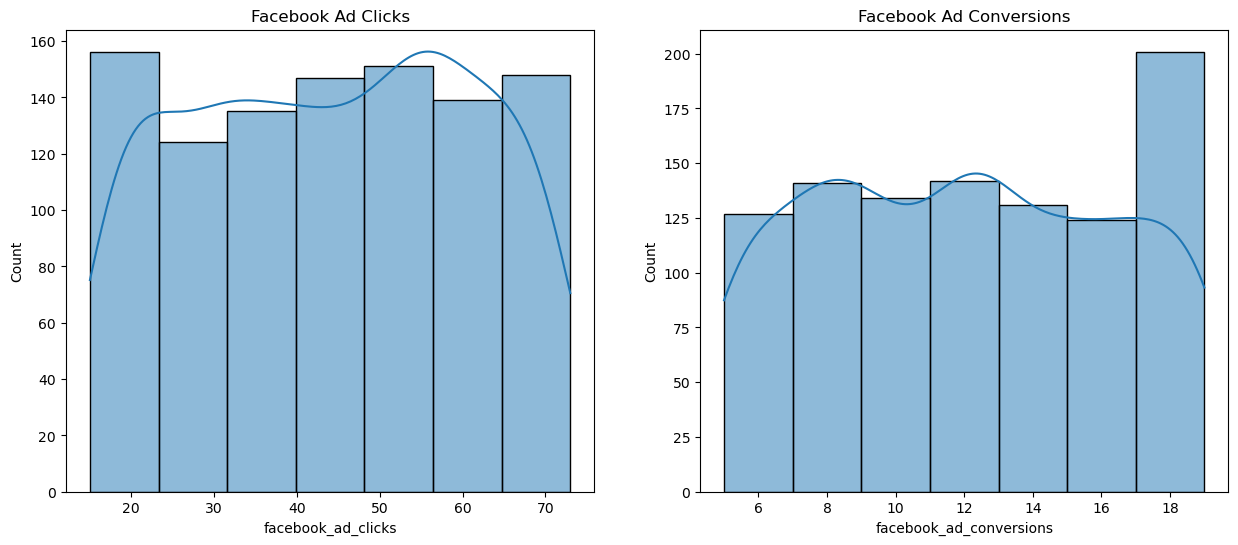

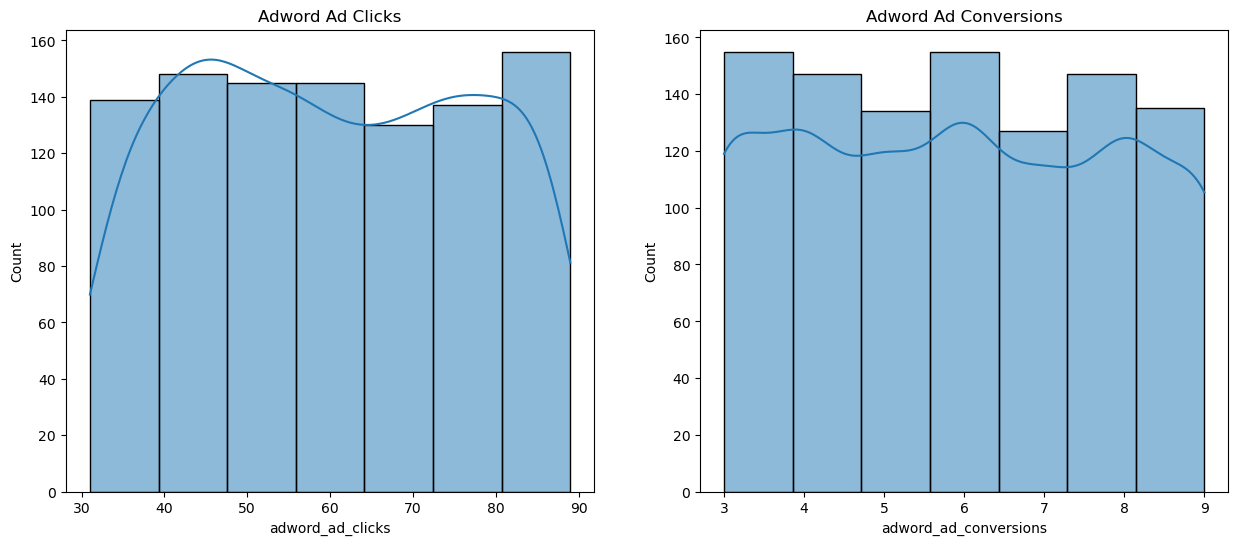

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['facebook_ad_clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['facebook_ad_conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Adword Ad Clicks')
sns.histplot(df['adword_ad_clicks'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('Adword Ad Conversions')
sns.histplot(df['adword_ad_conversions'], bins = 7, edgecolor = 'k', kde = True)
plt.show()

### How frequently do we observe days with high number of conversions compared to lower number of conversions?

In [19]:
df['facebook_ad_conversions']

0      14
1       9
2      15
3       9
4      12
       ..
995     8
996    13
997    19
998    19
999     9
Name: facebook_ad_conversions, Length: 1000, dtype: int64

In [18]:
def converstion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif conversion >= 6 and conversion < 10:
            category.append('6-10')
        elif conversion >= 10 and conversion < 15:
            category.append('10-15')
        else:
            category.append('More than 15')
    return category


df['facebook conversion category'] = converstion_category('facebook_ad_conversions')
df['adword conversion category'] = converstion_category('adword_ad_conversions')

In [21]:
df[['facebook conversion category', 'facebook_ad_conversions','adword conversion category','adword_ad_conversions']].head()

,facebook conversion category,facebook_ad_conversions,adword conversion category,adword_ad_conversions
0,10-15,14,6-10,9
1,6-10,9,6-10,6
2,More than 15,15,6-10,9
3,6-10,9,less than 6,3
4,10-15,12,less than 6,4


In [23]:
df['facebook conversion category'].value_counts()

facebook conversion category
10-15           334
More than 15    325
6-10            276
less than 6      65
Name: count, dtype: int64

In [25]:
facebook = pd.DataFrame(df['facebook conversion category'].value_counts().reset_index().rename(columns = {'facebook conversion category':'category'}))
facebook                       

,category,count
0,10-15,334
1,More than 15,325
2,6-10,276
3,less than 6,65


In [28]:
adwords = pd.DataFrame(df['adword conversion category'].value_counts().reset_index().rename(columns = {'adword conversion category':'category'}))
adwords  

,category,count
0,6-10,564
1,less than 6,436


In [31]:
category_df = pd.merge(facebook,adwords, on = 'category', how='outer').fillna(0)
category_df

,category,count_x,count_y
0,10-15,334,0.0
1,6-10,276,564.0
2,More than 15,325,0.0
3,less than 6,65,436.0


In [36]:
category_df = category_df.loc[[3,1,0,2]]
category_df

,category,count_x,count_y
3,less than 6,65,436.0
1,6-10,276,564.0
0,10-15,334,0.0
2,More than 15,325,0.0


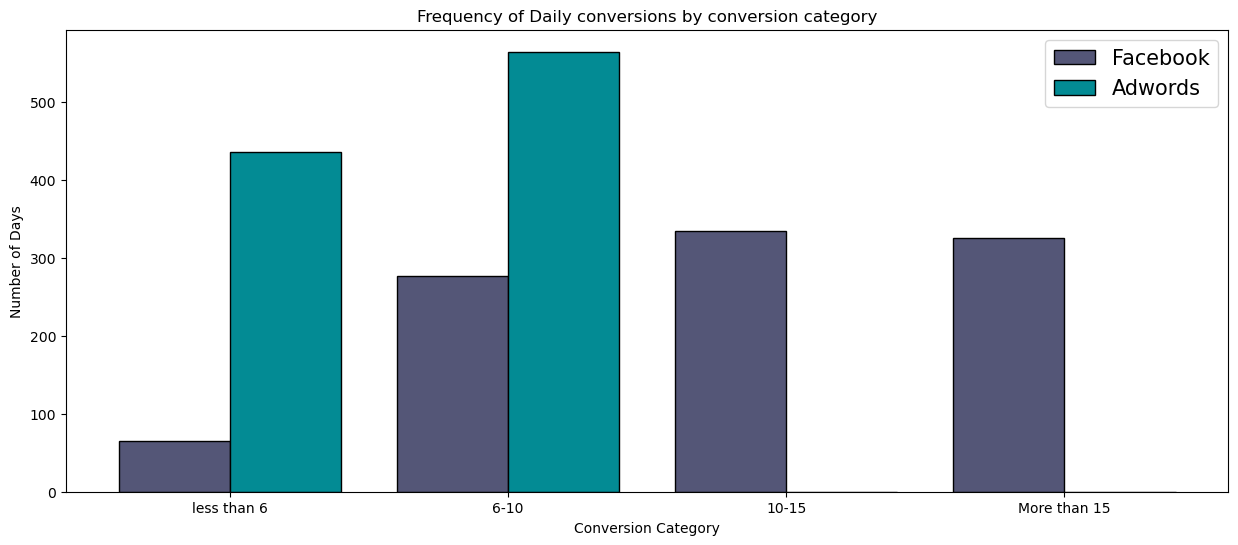

In [47]:
x_ax  = np.arange(len(category_df))
plt.figure(figsize=(15,6))
plt.bar(x_ax - 0.2, category_df['count_x'],0.4, label = 'Facebook', color = '#545677', edgecolor = 'k')
plt.bar(x_ax + 0.2, category_df['count_y'],0.4, label = 'Adwords', color = '#038B94', edgecolor = 'k')

plt.xticks(x_ax, category_df['category'])
plt.xlabel('Conversion Category')
plt.ylabel('Number of Days')
plt.title('Frequency of Daily conversions by conversion category')
plt.legend(fontsize = 15)
plt.show()

### Do more clicks on ads leads to more sales?

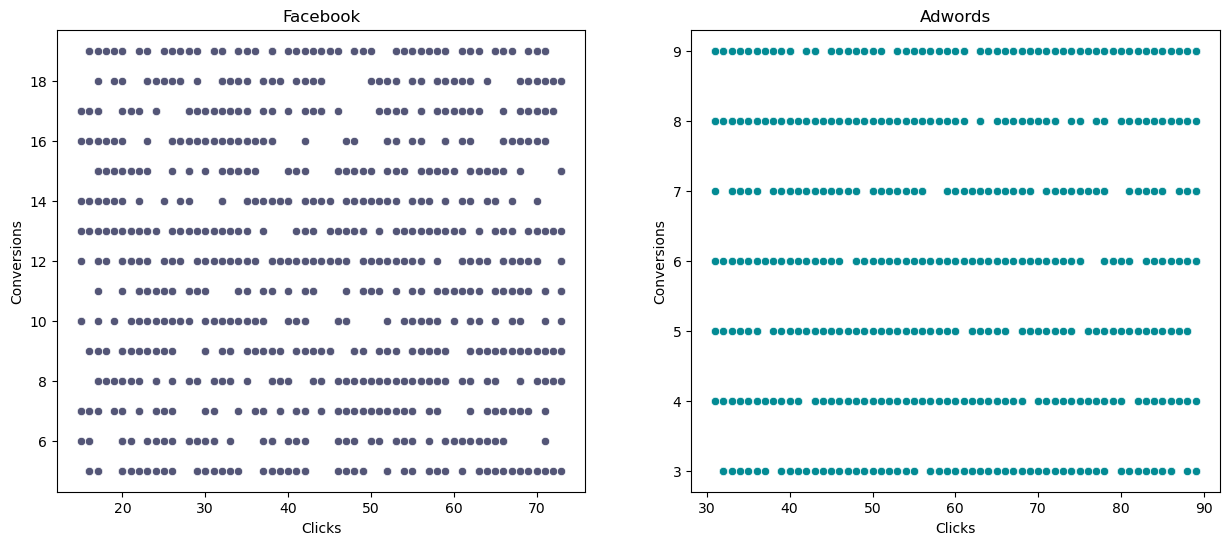

In [84]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(data = df, x=df['facebook_ad_clicks'], y=df['facebook_ad_conversions'], color = '#545677')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.subplot(1,2,2)
plt.title('Adwords')
sns.scatterplot(data = df, x=df['adword_ad_clicks'], y=df['adword_ad_conversions'], color = '#038B94')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

In [85]:
facebook_corr = df[['facebook_ad_clicks','facebook_ad_conversions']].corr()
facebook_corr

,facebook_ad_clicks,facebook_ad_conversions
facebook_ad_clicks,1.000000,-0.005009
facebook_ad_conversions,-0.005009,1.000000


In [53]:
adwords_corr = df[['adword_ad_conversions','adword_ad_clicks']].corr()
adwords_corr

,adword_ad_conversions,adword_ad_clicks
adword_ad_conversions,1.000000,0.004162
adword_ad_clicks,0.004162,1.000000


In [59]:
print('Correlation co-efficient \n-------')
print('Facebook :', round(facebook_corr.values[0,1],2))
print('Adwords :', round(adwords_corr.values[0,1],2))

Correlation co-efficient 
-------
Facebook : -0.01
Adwords : 0.0


## Hypothesis Testing

In [62]:
print('Mean Conversion:\n________')
print('Facebook : ', round(df['facebook_ad_conversions'].mean(),2))
print('Adwords : ', round(df['adword_ad_conversions'].mean(),2))

t_stats, p_value = stats.ttest_ind(df['facebook_ad_conversions'], df['adword_ad_conversions'], equal_var = False)
print('\nT static', t_stats,'\np-value', p_value)

if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept the Null Hypothesis')

Mean Conversion:
________
Facebook :  11.98
Adwords :  5.93

T static 40.25906231407935 
p-value 6.886351887267426e-237
Reject Null Hypothesis


## Regression Analysis

In [83]:
#Independent variable
X = df[['facebook_ad_clicks']]

#dependent variable(Target)
y = df[['facebook_ad_conversions']]

reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

#Evaluating Model
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy(R2 Score):', round(r2,2),'%')
print('Mean Squared Error:', round(mse,2))

Accuracy(R2 Score): 0.0 %
Mean Squared Error: 18.46


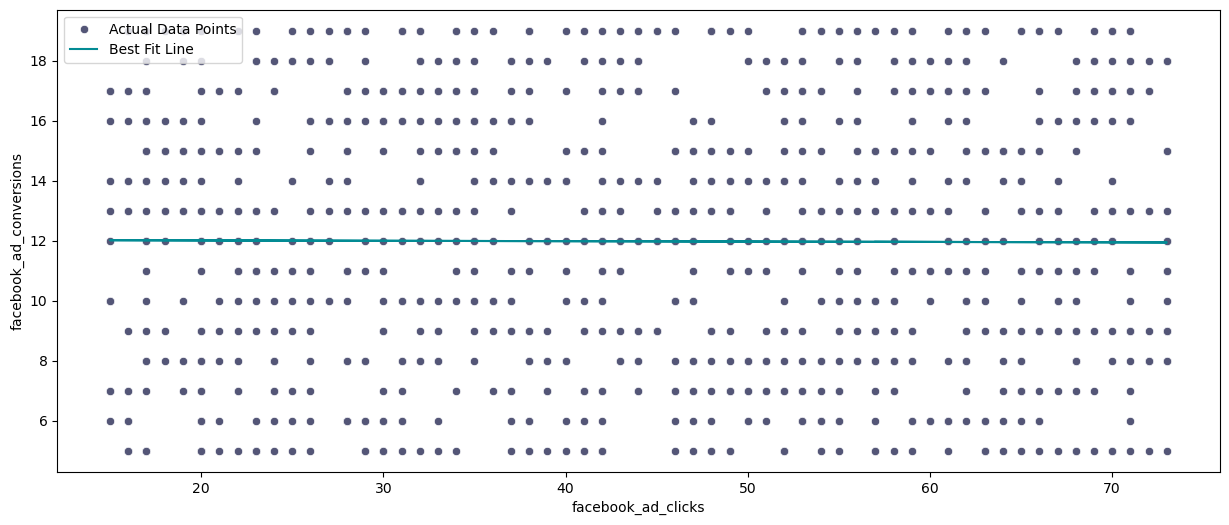

In [67]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['facebook_ad_clicks'], y=df['facebook_ad_conversions'], color ='#545677', label = 'Actual Data Points' )
plt.plot(df['facebook_ad_clicks'], prediction, color = '#038B94', label = 'Best Fit Line')
plt.legend()
plt.show()

In [87]:
print(f'For {27} Clicks, Expected Conversion: {round(reg_model.predict([[27]])[0][0],2)}')
print(f'For {99} Clicks, Expected Conversion: {round(reg_model.predict([[99]])[0][0],2)}')

For 27 Clicks, Expected Conversion: 12.0
For 99 Clicks, Expected Conversion: 11.9


In [106]:
df.dtypes

date_of_campaign                datetime64[ns]
facebook_ad_campaign                    object
facebook_ad_views                        int64
facebook_ad_clicks                       int64
facebook_ad_conversions                  int64
facebook_cost_per_ad                     int64
facebook_ctr                           float64
facebook_conversion_rate               float64
facebook_cost_per_click                float64
adword_ad_campaign                      object
adword_ad_views                          int64
adword_ad_clicks                         int64
adword_ad_conversions                    int64
adword_cost_per_ad                       int64
adword_ctr                             float64
adword_conversion_rate                 float64
adword_cost_per_click                  float64
facebook conversion category            object
adword conversion category              object
dtype: object

In [105]:
df['date_of_campaign'] = pd.to_datetime(df['date_of_campaign'])
df.drop(columns=['date'], axis =1, inplace =True)

In [114]:
gg = df[['date_of_campaign','facebook_ad_views','facebook_ad_clicks','facebook_ad_conversions','facebook_cost_per_ad','facebook_ctr','facebook_conversion_rate','facebook_cost_per_click']]
gg.head()

,date_of_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click
0,2021-12-22,3172,62,14,141,1.95,22.58,2.27
1,2021-12-24,3211,38,9,186,1.18,23.68,4.89
2,2021-12-25,1936,53,15,66,2.74,28.30,1.25
3,2021-12-25,1194,45,9,71,3.77,20.00,1.58
4,2021-12-26,2479,44,12,174,1.77,27.27,3.95


### At what time of months/days of the week that we observe conversions

In [127]:
gg['month'] = gg['date_of_campaign'].dt.month

In [128]:
gg['week'] = gg['date_of_campaign'].dt.weekday

In [130]:
gg.drop(columns=('day'), axis = 1, inplace=True)
gg.head()

,date_of_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,month,week
0,2021-12-22,3172,62,14,141,1.95,22.58,2.27,12,2
1,2021-12-24,3211,38,9,186,1.18,23.68,4.89,12,4
2,2021-12-25,1936,53,15,66,2.74,28.30,1.25,12,5
3,2021-12-25,1194,45,9,71,3.77,20.00,1.58,12,5
4,2021-12-26,2479,44,12,174,1.77,27.27,3.95,12,6


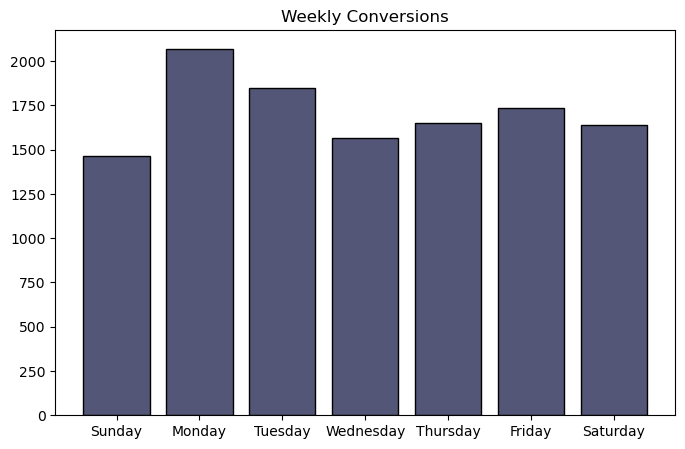

In [134]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversions')
weekly_conversions = gg.groupby('week')[['facebook_ad_conversions']].sum()
week_names = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(week_names, weekly_conversions['facebook_ad_conversions'], color = '#545677', edgecolor = 'k')
plt.show()

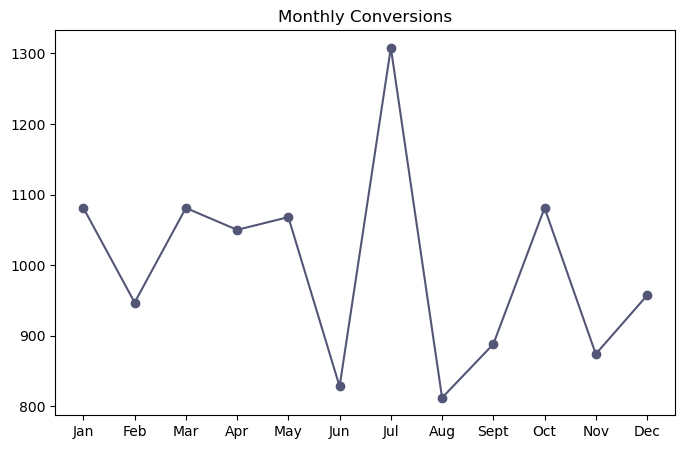

In [133]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversions')
monthly_conversions = gg.groupby('month')[['facebook_ad_conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
plt.plot(month_names, monthly_conversions['facebook_ad_conversions'],'-o', color = '#545677')
plt.show()

### How does the cost per conversion(CPC) trend over time ?
CPC : This metric used to evaluate the cost effectiveness and profitability of an online advertsising campaign. This helps to understand how much amount had been spent for each conversion, allowing to optimize the spending and targeting strategies effectively.

In [136]:
monthly_cpc = gg.groupby('month')[['facebook_ad_conversions','facebook_cost_per_ad']].sum()
monthly_cpc

,facebook_ad_conversions,facebook_cost_per_ad
month,,
1,1081,13835
2,947,12450
3,1081,14097
4,1050,12754
5,1068,13899
6,828,10645
7,1308,17527
8,812,11171
9,888,11638


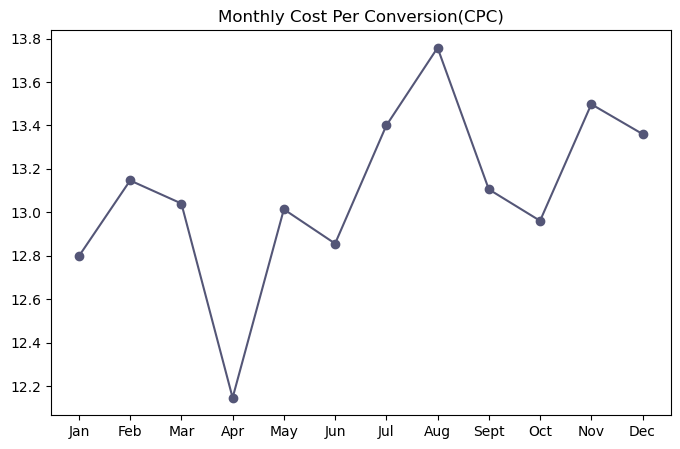

In [135]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion(CPC)')
monthly_cpc = gg.groupby('month')[['facebook_ad_conversions','facebook_cost_per_ad']].sum()
monthly_cpc['Cost per conversion'] = monthly_cpc['facebook_cost_per_ad'] / monthly_cpc['facebook_ad_conversions']
plt.plot(month_names, monthly_cpc['Cost per conversion'],'-o', color = '#545677')
plt.show()

### Is there any long-term equilibrium relationship between advertising spent and conversion rates?

In [141]:
score, p_value, _ = coint(gg['facebook_cost_per_ad'], gg['facebook_ad_conversions'])
print('Cointegration Test Score:', score)
print('P-Value:', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Cointegration Test Score: -31.71894313242047
P-Value: 0.0
Reject Null Hypothesis


In [145]:
# stats.chi2_contingency(gg['facebook_cost_per_ad'], gg['facebook_ad_conversions'])
gg.dtypes

date_of_campaign            datetime64[ns]
facebook_ad_views                    int64
facebook_ad_clicks                   int64
facebook_ad_conversions              int64
facebook_cost_per_ad                 int64
facebook_ctr                       float64
facebook_conversion_rate           float64
facebook_cost_per_click            float64
month                                int32
week                                 int32
dtype: object